<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_4_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_4'

In [6]:
os.listdir(base_path)

['data_add_delta_4_n20.csv',
 'data_add_delta_4_n30.csv',
 'data_add_delta_4_n60.csv',
 'data_add_delta_4_n120.csv',
 'data_add_delta_4_n250.csv']

In [7]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_4_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,97.314689,26.811758,47.145018,2.413629e+05,2.415442e+05,-1.087021e+07,1.111176e+07
1,0.0,1.0,84.811384,90.263394,48.152488,2.183805e+06,2.184038e+06,1.338644e+07,-1.120240e+07
2,0.0,2.0,85.367006,79.971966,30.234286,8.647524e+06,8.647730e+06,5.816909e+06,2.830821e+06
3,0.0,3.0,77.359299,99.361088,30.715902,4.998710e+06,4.998927e+06,1.344098e+07,-8.442053e+06
4,0.0,4.0,66.172252,77.690898,81.326401,4.056868e+06,4.057103e+06,1.641561e+07,-1.235851e+07
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,74.209446,68.505229,38.547898,5.608863e+06,5.609054e+06,6.706668e+05,4.938387e+06
119996,999.0,116.0,59.821851,70.493625,39.142519,-1.767652e+07,-1.767634e+07,2.782147e+06,-2.045849e+07
119997,999.0,117.0,27.825940,21.812149,86.626142,3.615605e+05,3.617067e+05,9.801596e+05,-6.184529e+05
119998,999.0,118.0,98.429329,29.603075,35.081782,6.088359e+05,6.090090e+05,-1.163298e+07,1.224199e+07


In [8]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,97.314689,26.811758,47.145018,2.413629e+05,2.415442e+05,-1.087021e+07,1.111176e+07
1,0.0,1.0,84.811384,90.263394,48.152488,2.183805e+06,2.184038e+06,1.338644e+07,-1.120240e+07
2,0.0,2.0,85.367006,79.971966,30.234286,8.647524e+06,8.647730e+06,5.816909e+06,2.830821e+06
3,0.0,3.0,77.359299,99.361088,30.715902,4.998710e+06,4.998927e+06,1.344098e+07,-8.442053e+06
4,0.0,4.0,66.172252,77.690898,81.326401,4.056868e+06,4.057103e+06,1.641561e+07,-1.235851e+07
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,74.209446,68.505229,38.547898,5.608863e+06,5.609054e+06,6.706668e+05,4.938387e+06
119996,999.0,116.0,59.821851,70.493625,39.142519,-1.767652e+07,-1.767634e+07,2.782147e+06,-2.045849e+07
119997,999.0,117.0,27.825940,21.812149,86.626142,3.615605e+05,3.617067e+05,9.801596e+05,-6.184529e+05
119998,999.0,118.0,98.429329,29.603075,35.081782,6.088359e+05,6.090090e+05,-1.163298e+07,1.224199e+07


In [9]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...         y_hat         e_hat
rep   index                        ...                            
0.0   0.0    97.314689  26.811758  ... -1.087021e+07  1.111176e+07
      1.0    84.811384  90.263394  ...  1.338644e+07 -1.120240e+07
      2.0    85.367006  79.971966  ...  5.816909e+06  2.830821e+06
      3.0    77.359299  99.361088  ...  1.344098e+07 -8.442053e+06
      4.0    66.172252  77.690898  ...  1.641561e+07 -1.235851e+07
...                ...        ...  ...           ...           ...
999.0 115.0  74.209446  68.505229  ...  6.706668e+05  4.938387e+06
      116.0  59.821851  70.493625  ...  2.782147e+06 -2.045849e+07
      117.0  27.825940  21.812149  ...  9.801596e+05 -6.184529e+05
      118.0  98.429329  29.603075  ... -1.163298e+07  1.224199e+07
      119.0  48.220330  29.617922  ... -6.377486e+06  6.435522e+06

[120000 rows x 7 columns]

In [10]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...         y_hat         e_hat
rep   index                        ...                            
0.0   0.0    97.314689  26.811758  ... -1.087021e+07  1.111176e+07
      1.0    84.811384  90.263394  ...  1.338644e+07 -1.120240e+07
      2.0    85.367006  79.971966  ...  5.816909e+06  2.830821e+06
      3.0    77.359299  99.361088  ...  1.344098e+07 -8.442053e+06
      4.0    66.172252  77.690898  ...  1.641561e+07 -1.235851e+07
...                ...        ...  ...           ...           ...
999.0 115.0  74.209446  68.505229  ...  6.706668e+05  4.938387e+06
      116.0  59.821851  70.493625  ...  2.782147e+06 -2.045849e+07
      117.0  27.825940  21.812149  ...  9.801596e+05 -6.184529e+05
      118.0  98.429329  29.603075  ... -1.163298e+07  1.224199e+07
      119.0  48.220330  29.617922  ... -6.377486e+06  6.435522e+06

[120000 rows x 7 columns]

In [11]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,97.314689,26.811758,47.145018,2.413629e+05,2.415442e+05,-1.087021e+07,1.111176e+07
1,0.0,1.0,84.811384,90.263394,48.152488,2.183805e+06,2.184038e+06,1.338644e+07,-1.120240e+07
2,0.0,2.0,85.367006,79.971966,30.234286,8.647524e+06,8.647730e+06,5.816909e+06,2.830821e+06
3,0.0,3.0,77.359299,99.361088,30.715902,4.998710e+06,4.998927e+06,1.344098e+07,-8.442053e+06
4,0.0,4.0,66.172252,77.690898,81.326401,4.056868e+06,4.057103e+06,1.641561e+07,-1.235851e+07
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,74.209446,68.505229,38.547898,5.608863e+06,5.609054e+06,6.706668e+05,4.938387e+06
119996,999.0,116.0,59.821851,70.493625,39.142519,-1.767652e+07,-1.767634e+07,2.782147e+06,-2.045849e+07
119997,999.0,117.0,27.825940,21.812149,86.626142,3.615605e+05,3.617067e+05,9.801596e+05,-6.184529e+05
119998,999.0,118.0,98.429329,29.603075,35.081782,6.088359e+05,6.090090e+05,-1.163298e+07,1.224199e+07


In [12]:
table.set_index(['rep', 'index'], inplace=True)

In [13]:
table

x1         x2  ...         y_hat         e_hat
rep   index                        ...                            
0.0   0.0    97.314689  26.811758  ... -1.087021e+07  1.111176e+07
      1.0    84.811384  90.263394  ...  1.338644e+07 -1.120240e+07
      2.0    85.367006  79.971966  ...  5.816909e+06  2.830821e+06
      3.0    77.359299  99.361088  ...  1.344098e+07 -8.442053e+06
      4.0    66.172252  77.690898  ...  1.641561e+07 -1.235851e+07
...                ...        ...  ...           ...           ...
999.0 115.0  74.209446  68.505229  ...  6.706668e+05  4.938387e+06
      116.0  59.821851  70.493625  ...  2.782147e+06 -2.045849e+07
      117.0  27.825940  21.812149  ...  9.801596e+05 -6.184529e+05
      118.0  98.429329  29.603075  ... -1.163298e+07  1.224199e+07
      119.0  48.220330  29.617922  ... -6.377486e+06  6.435522e+06

[120000 rows x 7 columns]

In [14]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

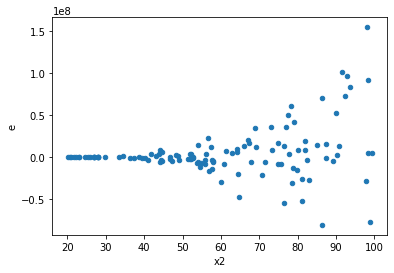

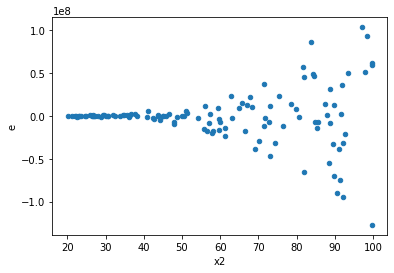

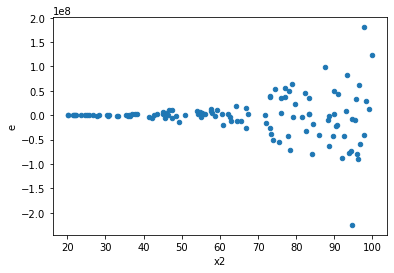

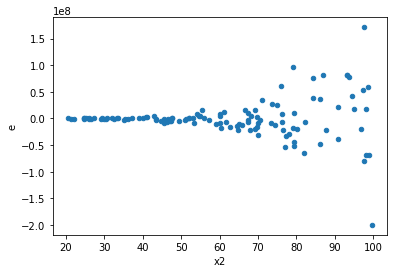

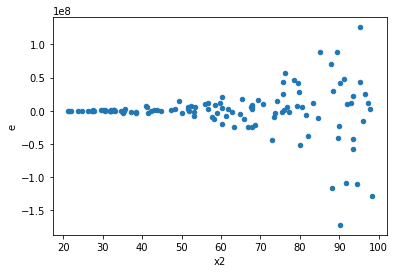

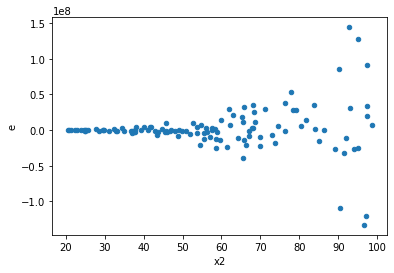

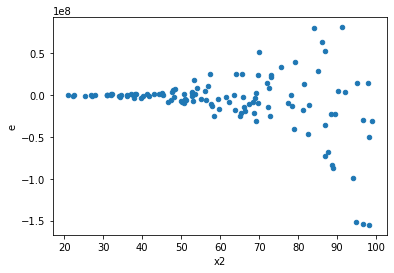

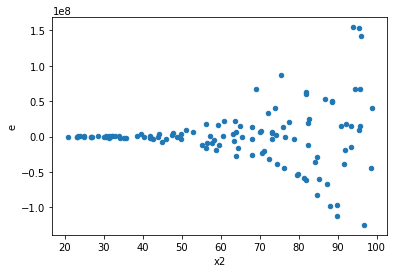

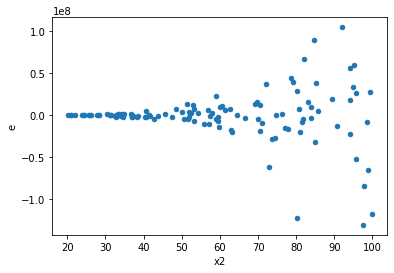

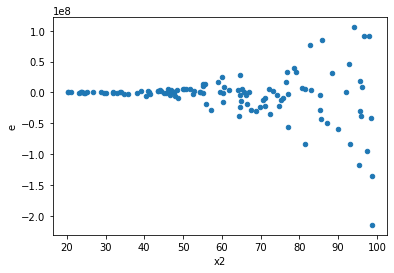

In [15]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [16]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [17]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,45.0,45.0,8.720381812734768e+16,318425901892561.4,1981904957439720.0,7236952315740.031,273.8590598599316,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
1.0,45.0,45.0,1.1145101437416629e+17,214275341121928.62,2532977599412870.0,4869894116407.469,520.1299122457006,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
2.0,45.0,45.0,1.6501948016358093e+17,770732065104520.1,3750442730990475.5,17516637843284.549,214.1074539842875,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
3.0,45.0,45.0,1.6051873739749226e+17,414311056559670.75,3648153122670278.5,9416160376356.154,387.43532149587634,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
4.0,45.0,45.0,1.490403326989667e+17,436732104057378.94,3387280288612879.5,9925729637667.703,341.2625985457332,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
5.0,45.0,45.0,1.0807794608106858e+17,317885226535365.7,2456316956387922.0,7224664239440.129,339.99046529784096,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
6.0,45.0,45.0,1.1439879487808029e+17,555315960162896.2,2599972610865461.0,12620817276429.459,206.00667563115346,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
7.0,45.0,45.0,1.7391644868278298e+17,1182087795437814.5,3952646560972340.5,26865631714495.785,147.12650731527842,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
8.0,45.0,45.0,1.0782274339706106e+17,303618286098767.56,2450516895387751.5,6900415593153.809,355.1259865882588,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity


In [18]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,8.720381812734768e+16,318425901892561.4,1981904957439720.0,7236952315740.031,273.8590598599316,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
1.0,45.0,45.0,1.1145101437416629e+17,214275341121928.62,2532977599412870.0,4869894116407.469,520.1299122457006,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
2.0,45.0,45.0,1.6501948016358093e+17,770732065104520.1,3750442730990475.5,17516637843284.549,214.1074539842875,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
3.0,45.0,45.0,1.6051873739749226e+17,414311056559670.75,3648153122670278.5,9416160376356.154,387.43532149587634,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
4.0,45.0,45.0,1.490403326989667e+17,436732104057378.94,3387280288612879.5,9925729637667.703,341.2625985457332,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
5.0,45.0,45.0,1.0807794608106858e+17,317885226535365.7,2456316956387922.0,7224664239440.129,339.99046529784096,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
6.0,45.0,45.0,1.1439879487808029e+17,555315960162896.2,2599972610865461.0,12620817276429.459,206.00667563115346,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
7.0,45.0,45.0,1.7391644868278298e+17,1182087795437814.5,3952646560972340.5,26865631714495.785,147.12650731527842,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
8.0,45.0,45.0,1.0782274339706106e+17,303618286098767.56,2450516895387751.5,6900415593153.809,355.1259865882588,2.220446049250313e-16,Reject001=0 : Heteroscedasticity


In [19]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64